In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline 
import matplotlib.pyplot as plt

In [100]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_est = pd.read_csv('Ames Real Estate Data.csv')

housingdf = housing.copy()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Cleaning X_train

## Seperating Quantative and Qualitative data

strings are object datatype so we filter columns by this

In [101]:
quant = [col for col in housingdf.columns if housingdf.dtypes[col] != 'object']
qual = [col for col in housingdf.columns if housingdf.dtypes[col] == 'object']

## Imputing Missing Data (_Quantitative_)

fill missing data with 0s

In [102]:
housingdf[quant].isna().mean().nlargest(8).round(4) * 100

LotFrontage     17.91
GarageYrBlt      5.00
MasVnrArea       0.54
BsmtFullBath     0.08
BsmtHalfBath     0.08
BsmtFinSF1       0.04
BsmtFinSF2       0.04
BsmtUnfSF        0.04
dtype: float64

In [103]:
housingdf[quant] = housingdf.loc[:, quant].fillna(value=0)

In [104]:
housingdf[quant].isna().mean().nlargest(8).round(4) * 100

PID            0.0
GrLivArea      0.0
SalePrice      0.0
MSSubClass     0.0
LotFrontage    0.0
LotArea        0.0
OverallQual    0.0
OverallCond    0.0
dtype: float64

## Imputing Missing Data (_Qualitative_)

dealing with missing data and dummifying

In [105]:
housingdf[qual].isna().mean().nlargest(8).round(4) * 100

PoolQC          99.65
MiscFeature     96.24
Alley           93.49
Fence           79.65
FireplaceQu     48.10
GarageFinish     5.00
GarageQual       5.00
GarageCond       5.00
dtype: float64

dropping PoolQC, MiscFeature, Alley, Fence since missing lots of data

In [106]:
housingdf.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

removing removed features from qual list

In [107]:
ew = ['PoolQC','MiscFeature','Alley','Fence']
qual = [q for q in qual if q not in ew]

adding missing category for any nan values in qual columns

In [108]:
for col in qual:
    housingdf[col] = housingdf[col].astype('category')
    if housingdf[col].isnull().any:
        housingdf[col] = housingdf[col].cat.add_categories(['MISSING'])
        housingdf[col] = housingdf[col].fillna('MISSING')

In [109]:
housingdf[qual].isna().mean().nlargest(10)

MSZoning        0.0
Street          0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
dtype: float64

In [110]:
h_quant = housingdf.loc[:, quant]

In [111]:
h_quant

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,0.0,7890,6,6,1939,1950,...,399.0,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,266.0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,216.0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,281.0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,0.0,8854,6,6,1916,1950,...,192.0,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,0.0,13680,3,5,1955,1955,...,452.0,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,82.0,6270,5,6,1949,1950,...,871.0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,0.0,8826,7,5,2000,2000,...,486.0,193,96,0,0,0,0,0,7,2007


### Dummifying Nominal Features

In [176]:
nominals = ['MSZoning','Street','LandContour','Utilities','LotConfig','Neighborhood',
           'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
           'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical',
           'Functional','GarageType', 'PavedDrive', 'SaleType','SaleCondition','LotShape','LandSlope']

In [177]:
nominaldf = housingdf.loc[:, nominals]

In [113]:
#qualdf = housingdf.loc[:, qual]
#print(pd.get_dummies(, prefix=['column1', 'column2']))

In [189]:
ndummydf = pd.get_dummies(nominaldf, drop_first=True)

### Label Encoding Ordinal Features

In [207]:
ordinals = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','HeatingQC', 'KitchenQual','FireplaceQu','GarageFinish','GarageQual',
           'GarageCond']

In [191]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [192]:
ordinaldf = housingdf.loc[:, ordinals]

In [195]:
le = LabelEncoder()

# apply "le.fit_transform"
ord_encoded = ordinaldf.apply(le.fit_transform)


In [211]:
ord_encoded

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
1,3,4,5,5,4,5,6,4,4,2,3,5,5
2,2,4,2,5,3,2,0,4,2,3,0,5,5
3,2,4,5,5,4,0,6,0,2,3,3,5,4
4,2,2,1,5,4,6,6,2,4,3,3,5,5
5,2,4,2,5,4,2,6,0,2,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,3,4,5,5,4,6,6,1,1,2,3,1,4
760,3,4,3,3,2,4,4,0,4,2,3,5,5
761,3,4,5,5,4,1,6,4,4,3,3,5,5
762,2,4,2,5,4,2,6,0,2,5,0,5,5


### combining dataframes

In [199]:
# concat three dataframes: quantitative variables, nominal category vars, and ordinal category vars
newhousing = pd.concat([h_quant,ord_encoded,ndummydf],axis=1)

In [200]:
newhousing

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_MISSING,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_MISSING,LandSlope_Mod,LandSlope_Sev,LandSlope_MISSING
1,909176150,856,126000,30,0.0,7890,6,6,1939,1950,...,1,0,0,0,0,1,0,0,0,0
2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,...,1,0,0,0,0,1,0,0,0,0
3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,...,1,0,0,0,0,1,0,0,0,0
4,535377150,1039,114000,70,80.0,8146,4,8,1900,2003,...,1,0,0,0,0,1,0,0,0,0
5,534177230,1665,227000,60,70.0,8400,8,6,2001,2001,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,0.0,8854,6,6,1916,1950,...,1,0,0,0,0,1,0,0,0,0
760,905402060,1733,139600,20,0.0,13680,3,5,1955,1955,...,1,0,0,0,0,0,0,0,0,0
761,909275030,2002,145000,90,82.0,6270,5,6,1949,1950,...,1,0,0,0,0,1,0,0,0,0
762,907192040,1842,217500,60,0.0,8826,7,5,2000,2000,...,1,0,0,0,0,1,0,0,0,0


### Feature Engineering

In [201]:
newhousing['Baths'] = newhousing['BsmtFullBath'] + (newhousing['BsmtHalfBath']/2) + newhousing['FullBath']+ (newhousing['HalfBath']/2)

In [202]:
newhousing.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis=1,inplace=True)

In [209]:
newhousing.Baths

1      2.0
2      3.0
3      1.0
4      1.0
5      3.5
      ... 
759    1.0
760    2.0
761    2.0
762    3.5
763    2.5
Name: Baths, Length: 2580, dtype: float64

In [213]:
newhousing.drop('PID', axis=1, inplace = True)

---

## CSVs

In [214]:
newhousing.to_csv('newhousing.csv',index=False)

In [173]:
dummydf.to_csv('dummyvars.csv', index=False)

In [ ]:
labelencoder introduces distance
ordinal 

---

## Regression Techniques

In [215]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [216]:
features = newhousing.loc[:, newhousing.columns != 'SalePrice'].columns.tolist()
X = newhousing[features]
y = newhousing['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [223]:

lcv = LassoCV(normalize=True, max_iter=2000)
lcv.fit(X_train,y_train)

importance = np.abs(lcv.coef_)
print(importance)

[5.03737491e+01 1.04037003e+02 3.00890554e+00 3.80098647e-01
 9.81346427e+03 4.35657516e+03 1.75348147e+02 8.50638060e+01
 2.33917476e+01 2.00841397e+01 9.42531930e+00 0.00000000e+00
 1.39815949e+01 1.08655409e+00 0.00000000e+00 0.00000000e+00
 8.87036604e+02 4.64761582e+03 0.00000000e+00 4.99502265e+03
 0.00000000e+00 2.32345046e+03 1.96079520e+01 3.88192827e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.02001631e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.58724494e+03 0.00000000e+00 1.88371296e+03 0.00000000e+00
 2.20204928e+03 0.00000000e+00 0.00000000e+00 4.66488635e+02
 2.75886012e+03 6.08834081e+02 1.06370387e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.15111256e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.31322714e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.62135792e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [224]:
lcv.score(X_train,y_train)

0.9127814500575039

In [225]:
lcv.score(X_test,y_test)

0.9004875759557112

In [227]:
lcv_a = lcv.alpha_

In [231]:
alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)

NameError: name 'linear_model' is not defined

In [230]:
alphas = np.logspace(-4, -1, 10)
print('CV', lcv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lcv.score(X_train,y_train), color='b', ls='--')
plt.axvline(lcv_a, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

CV [ 5.03737491e+01 -1.04037003e+02  3.00890554e+00  3.80098647e-01
  9.81346427e+03  4.35657516e+03  1.75348147e+02  8.50638060e+01
  2.33917476e+01  2.00841397e+01  9.42531930e+00 -0.00000000e+00
  1.39815949e+01  1.08655409e+00  0.00000000e+00 -0.00000000e+00
 -8.87036604e+02 -4.64761582e+03  0.00000000e+00  4.99502265e+03
 -0.00000000e+00  2.32345046e+03  1.96079520e+01  3.88192827e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.02001631e+01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -9.58724494e+03  0.00000000e+00 -1.88371296e+03  0.00000000e+00
 -2.20204928e+03  0.00000000e+00 -0.00000000e+00 -4.66488635e+02
 -2.75886012e+03 -6.08834081e+02 -1.06370387e+03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.15111256e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.31322714e+03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  6.62135792e+02 -0.00

NameError: name 'scores' is not defined

<AxesSubplot:>

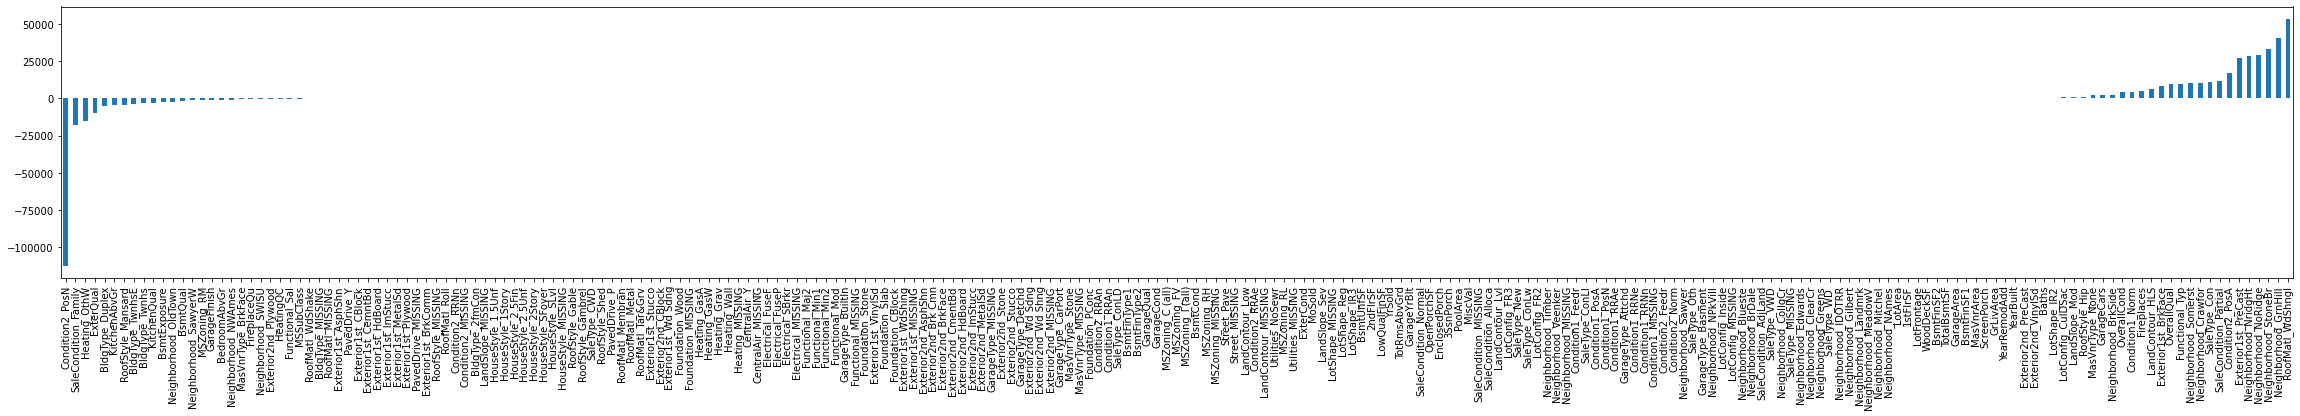

In [222]:
pd.Series(dict(zip(X_train.columns, lcv.coef_))).sort_values().plot(kind='bar',figsize=(40,5))

In [221]:
X_train.columns[clf.coef_<0.05]

Index(['MSSubClass', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'OpenPorchSF',
       'EnclosedPorch',
       ...
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_MISSING', 'LotShape_IR3',
       'LotShape_Reg', 'LotShape_MISSING', 'LandSlope_Sev',
       'LandSlope_MISSING'],
      dtype='object', length=188)

In [158]:
t = pd.Series(dict(zip(X_train.columns, clf.coef_))).sort_values()
